In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d waynewu5254/face-recognition-test-on-1027

100% 639M/641M [00:39<00:00, 15.6MB/s]
100% 641M/641M [00:39<00:00, 17.2MB/s]


In [ ]:
import zipfile
import os
zip_file = zipfile.ZipFile('/content/face-recognition-test-on-1027.zip')
zip_file.extractall()

data_dir="/content/dataset"

In [ ]:
os.listdir(data_dir)

['Courteney_Cox',
 'David_Schwimmer',
 'bhuvan_bam',
 'Kunal_Nayya',
 'pewdiepie',
 'dhoni',
 'Johnny_Galeck',
 'angelina_jolie',
 'manoj_bajpayee',
 'hardik_pandya',
 'messi',
 'Lisa_Kudrow',
 'Matt_LeBlanc',
 'scarlett_johansson',
 'ROHIT_SHARMA',
 'brad_pitt',
 'ronaldo',
 'Pankaj_Tripathi',
 'arnold_schwarzenegger',
 'Simon_Helberg',
 'Matthew_Perry',
 'aishwarya_rai',
 'mohamed_ali',
 'sylvester_stallone',
 'Jennifer_Aniston',
 'Jim_Parsons',
 'virat_kohli',
 'suresh_raina',
 'random_person',
 'Sachin_Tendulka']

In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-3rausgcw
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-3rausgcw
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8298 sha256=0976e0a2a8b7fdcdaa109d131c37bd6b8fd4ccb3f268e4dd06bbd0c9eb5f2e38
  Stored in directory: /tmp/pip-ephem-wheel-cache-vrrfeul0/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


In [ ]:
!pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_vggface.vggface import VGGFace
from tensorflow.keras import Model
from keras.layers import Dense,Flatten,Dropout


In [ ]:
#create dataset

batch_size = 32
image_shape = (224,224)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

train_dataset = train_datagen.flow_from_directory(
    data_dir,
    target_size= image_shape,  # Ukuran gambar yang diharapkan
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=123,
    subset='training'

)


Found 12724 images belonging to 30 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

val_dataset = val_datagen.flow_from_directory(
    data_dir,
    target_size= image_shape,  # Ukuran gambar yang diharapkan
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=123,
    subset='validation'

)


Found 3165 images belonging to 30 classes.


In [ ]:
classes = list(train_dataset.class_indices.keys())
classes

['Courteney_Cox',
 'David_Schwimmer',
 'Jennifer_Aniston',
 'Jim_Parsons',
 'Johnny_Galeck',
 'Kunal_Nayya',
 'Lisa_Kudrow',
 'Matt_LeBlanc',
 'Matthew_Perry',
 'Pankaj_Tripathi',
 'ROHIT_SHARMA',
 'Sachin_Tendulka',
 'Simon_Helberg',
 'aishwarya_rai',
 'angelina_jolie',
 'arnold_schwarzenegger',
 'bhuvan_bam',
 'brad_pitt',
 'dhoni',
 'hardik_pandya',
 'manoj_bajpayee',
 'messi',
 'mohamed_ali',
 'pewdiepie',
 'random_person',
 'ronaldo',
 'scarlett_johansson',
 'suresh_raina',
 'sylvester_stallone',
 'virat_kohli']

In [ ]:
classes = list(val_dataset.class_indices.keys())
classes

['Courteney_Cox',
 'David_Schwimmer',
 'Jennifer_Aniston',
 'Jim_Parsons',
 'Johnny_Galeck',
 'Kunal_Nayya',
 'Lisa_Kudrow',
 'Matt_LeBlanc',
 'Matthew_Perry',
 'Pankaj_Tripathi',
 'ROHIT_SHARMA',
 'Sachin_Tendulka',
 'Simon_Helberg',
 'aishwarya_rai',
 'angelina_jolie',
 'arnold_schwarzenegger',
 'bhuvan_bam',
 'brad_pitt',
 'dhoni',
 'hardik_pandya',
 'manoj_bajpayee',
 'messi',
 'mohamed_ali',
 'pewdiepie',
 'random_person',
 'ronaldo',
 'scarlett_johansson',
 'suresh_raina',
 'sylvester_stallone',
 'virat_kohli']

In [ ]:
vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
for layer in vgg_model.layers:
  layer.trainable = False
vgg_model.summary()


58909280/58909280 [==============================] - 3s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                      

In [ ]:
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', name='fc6')(x)
x = Dense(64, activation='relu', name='fc7')(x)
out = Dense(len(classes), activation='softmax', name='fc8')(x)
custom_vgg_model = Model(vgg_model.input, out)

In [ ]:
custom_vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90:
                print("\nReached 90% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True
callbacks = myCallback()

In [ ]:
weight_decay = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=weight_decay)

In [ ]:
# Set the training parameters
custom_vgg_model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Train the model
history = custom_vgg_model.fit(train_dataset, epochs=30, steps_per_epoch=100, validation_data = val_dataset, verbose = 1, validation_steps=50, callbacks=[callbacks])

Epoch 1/30
100/100 [==============================] - 71s 586ms/step - loss: 1.8012 - accuracy: 0.5522 - val_loss: 0.5715 - val_accuracy: 0.8675
Epoch 2/30
100/100 [==============================] - 60s 599ms/step - loss: 0.7382 - accuracy: 0.8106 - val_loss: 0.3326 - val_accuracy: 0.9275
Epoch 3/30
100/100 [==============================] - 61s 607ms/step - loss: 0.5708 - accuracy: 0.8572 - val_loss: 0.2951 - val_accuracy: 0.9456
Epoch 4/30
100/100 [==============================] - 58s 582ms/step - loss: 0.5035 - accuracy: 0.8775 - val_loss: 0.2904 - val_accuracy: 0.9463
Epoch 5/30
100/100 [==============================] - 59s 586ms/step - loss: 0.4786 - accuracy: 0.8806 - val_loss: 0.3011 - val_accuracy: 0.9438
Epoch 6/30
100/100 [==============================] - 62s 618ms/step - loss: 0.4433 - accuracy: 0.8883 - val_loss: 0.3191 - val_accuracy: 0.9319
Epoch 7/30
100/100 [==============================] - 58s 585ms/step - loss: 0.4210 - accuracy: 0.8909 - val_loss: 0.3092 - val_ac

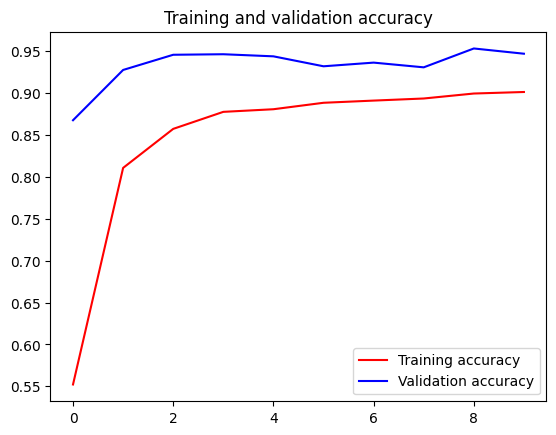

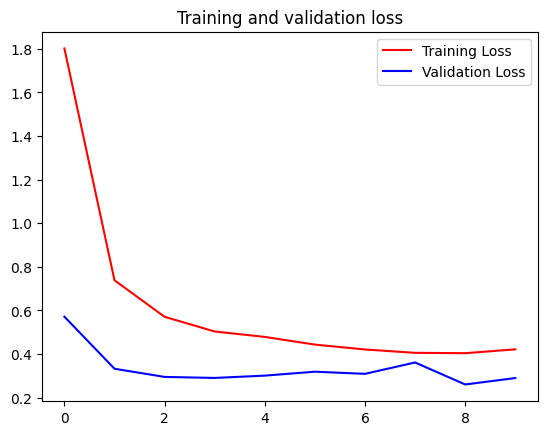

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = tf.keras.utils.array_to_img(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = custom_vgg_model.predict(images, batch_size=32)
    print(image_path)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])


In [ ]:
#predict_image('/content/th (3).jpeg')

FileNotFoundError: ignored

In [ ]:
custom_vgg_model.save("./faceRecog.h5")
